Importamos librerias y las bases origen y testear

In [ ]:
!pip install feature-engine

In [149]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from feature_engine.preprocessing import MatchVariables
from feature_engine.encoding import RareLabelEncoder, OneHotEncoder,OrdinalEncoder, CountFrequencyEncoder
from feature_engine.imputation import AddMissingIndicator, CategoricalImputer, RandomSampleImputer,EndTailImputer, MeanMedianImputer, ArbitraryNumberImputer
from sklearn_pandas import DataFrameMapper
from feature_engine.outliers import Winsorizer, OutlierTrimmer
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import CountVectorizer
import datetime
from sklearn.compose import ColumnTransformer
from feature_engine.datetime import DatetimeFeatures
import pickle
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn import set_config
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from feature_engine.transformation import PowerTransformer
from feature_engine.creation import RelativeFeatures
from feature_engine.selection import DropFeatures

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt



In [117]:
import matplotlib.pyplot as plt

In [ ]:
pd.options.display.max_columns = None

In [172]:
db=pd.read_csv("origen.csv", sep=",")

In [142]:
db.shape

(15178, 31)

In [ ]:
test=pd.read_csv("testear.csv", sep=",")

Estadisticas descriptivas principales

In [ ]:
db.describe()

Id  averageRating      numVotes       isAdult     startYear  \
count  15178.000000   15178.000000  1.517800e+04  15178.000000  15178.000000   
mean    7588.500000       6.859013  1.658881e+03      0.020095   1999.148439   
std     4381.655528       1.418139  2.625960e+04      0.140329     35.605074   
min        0.000000       1.000000  5.000000e+00      0.000000      0.000000   
25%     3794.250000       6.100000  1.000000e+01      0.000000   1991.000000   
50%     7588.500000       7.000000  2.300000e+01      0.000000   2007.000000   
75%    11382.750000       7.800000  9.500000e+01      0.000000   2015.000000   
max    15177.000000      10.000000  1.493662e+06      1.000000   2021.000000   

            endYear  runtimeMinutes  seasonNumber  episodeNumber     ordering  \
count  15178.000000    15178.000000   6825.000000    6825.000000  5754.000000   
mean      62.002042       41.461457      3.983004      57.982857     3.391727   
std      346.867339       43.738329      6.061260     628.389557     5.064559   
min        0.000000        0.000000      0.000000       0.000000     1.000000   
25%        0.000000        0.000000      1.000000       3.000000     1.000000   
50%        0.000000       28.000000      2.000000       8.000000     2.000000   
75%        0.000000       75.000000      4.000000      17.000000     3.000000   
max     2021.000000      780.000000     70.000000   14298.000000   106.000000   

       isOriginalTitle        budget  popularity       revenue     runtime  
count      5754.000000  7.180000e+02  718.000000  7.180000e+02  716.000000  
mean          0.000174  5.879068e+06    3.363524  1.742221e+07   93.752793  
std           0.013183  2.260087e+07    6.913656  7.823587e+07   30.430507  
min           0.000000  0.000000e+00    0.000000  0.000000e+00    0.000000  
25%           0.000000  0.000000e+00    0.387516  0.000000e+00   86.000000  
50%           0.000000  0.000000e+00    1.081011  0.000000e+00   94.000000  
75%           0.000000  0.000000e+00    4.317293  0.000000e+00  106.250000  
max           1.000000  3.000000e+08  133.827820  9.610000e+08  287.000000

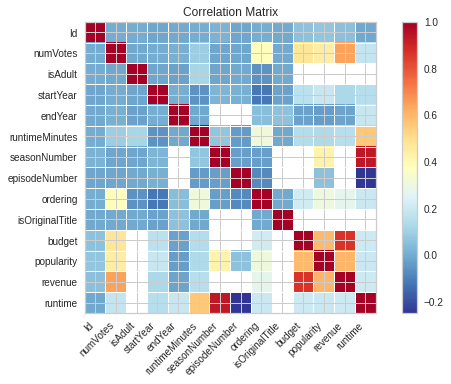

In [141]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
corr = db.set_index('averageRating').corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83030 entries, 0 to 83029
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    83030 non-null  int64  
 1   averageRating         83030 non-null  float64
 2   numVotes              83029 non-null  float64
 3   titleType             83029 non-null  object 
 4   isAdult               83029 non-null  float64
 5   startYear             83029 non-null  float64
 6   endYear               83029 non-null  float64
 7   runtimeMinutes        83029 non-null  float64
 8   genres_x              83028 non-null  object 
 9   directors             83029 non-null  object 
 10  writers               83029 non-null  object 
 11  seasonNumber          37245 non-null  float64
 12  episodeNumber         37245 non-null  float64
 13  ordering              31390 non-null  float64
 14  language              31390 non-null  object 
 15  attributes         

In [ ]:
base2=db[:]

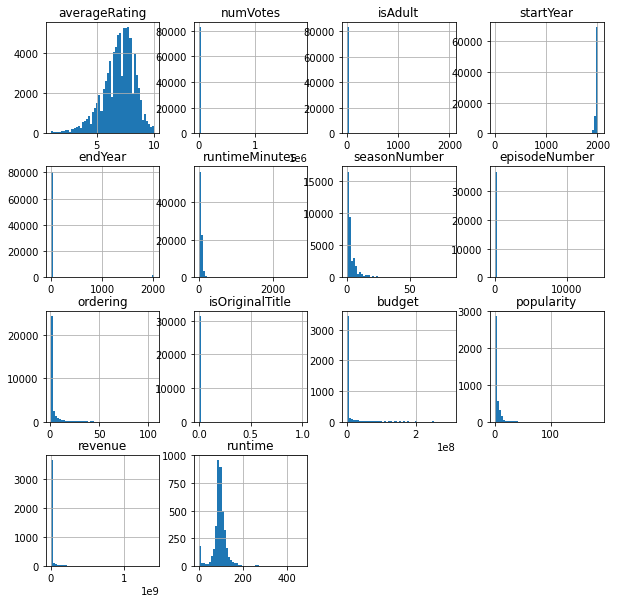

In [ ]:
base2.hist(bins=50, figsize=(10,10))
plt.show()

In [ ]:
categorical_columnsdb = [c for c in db.columns if db[c].dtype == 'O']
numerical_columnsdb = [c for c in db.columns if db[c].dtype != 'O']
numerical_columnsdb

['Id',
 'averageRating',
 'numVotes',
 'isAdult',
 'startYear',
 'endYear',
 'runtimeMinutes',
 'seasonNumber',
 'episodeNumber',
 'ordering',
 'isOriginalTitle',
 'budget',
 'popularity',
 'revenue',
 'runtime']

In [ ]:
db.columns

Index(['Id', 'averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'attributes',
       'isOriginalTitle', 'adult', 'budget', 'genres_y', 'original_language',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime', 'status',
       'tagline', 'video'],
      dtype='object')

Particionamos

In [189]:
X = db.drop(columns=['averageRating'])
y = db['averageRating']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=33)

In [206]:
X_train.shape

(733155, 33)

In [205]:
y_val.shape

(244386,)

In [197]:
db.shape

(977541, 31)

In [ ]:
categorical_columns = [c for c in X.columns if X[c].dtype == 'O']
numerical_columns = [c for c in X.columns if X[c].dtype != 'O']
numerical_columns

In [ ]:
OHE=["titleType","language","adult","original_language","status","video"]
AMI=["attributes","overview","tagline"]
NUM=['numVotes', 'startYear', 'endYear', 'runtimeMinutes', 'seasonNumber', 'episodeNumber','ordering', 'budget', 'popularity', 'revenue', 'runtime',"isAdult","isOriginalTitle"]
BIN=["gg","dd","ww","release_date"]+OHE
U=["release_date"]+OHE


In [ ]:
pipe = Pipeline([
    ('0', columnDropperTransformer(["Id"])), 
    ("2", EndTailImputer(imputation_method='gaussian', tail='right', fold=3, variables=NUM)),
    ('3', CategoricalImputer(fill_value="Missing", return_object=True, variables=BIN,ignore_format=True)),
    ('4', binarizer1),
    ('5', binarizer2),
    ('6', binarizer3),
    ('8', AddMissingIndicator(missing_only=False, variables=AMI)),
    ('9', columnDropperTransformer(["attributes","overview","tagline","genres_x","writers","directors","genres_y","production_companies","production_countries"])),
    ('10', OneHotEncoder(top_categories=3, drop_last=True, drop_last_binary=True, variables=U, ignore_format=False)),
    
])

In [ ]:
class columnDropperTransformer():
    def __init__(self,columns):
        self.columns=columns

    def transform(self,X,y=None):
        return X.drop(self.columns,axis=1)

    def fit(self, X, y=None):
        return self 

In [ ]:
binarizer1 = DataFrameMapper([
     ("gg", MultiLabelBinarizer(
classes=["Comedy","Drama","Documentary","Action","Missing"])),
], df_out=True, default=None)

In [ ]:
binarizer2 = DataFrameMapper([
     ("dd", MultiLabelBinarizer(
classes=["nm1337210","nm3766090","nm0123273","nm3005544","Missing"])),
], df_out=True, default=None)

In [ ]:
binarizer3 = DataFrameMapper([
     ("ww", MultiLabelBinarizer(
classes=["nm3005544","nm3766090","nm1444457","nm1108327","Missing"])),
], df_out=True, default=None)

In [ ]:
_=pipe[:5].fit(X_train, y_train)
pipe[:5].transform(X_train)
#pipe[:-1].get_feature_names_out()
#pipe[0].fit_transform(X)

In [ ]:
set_config(display="diagram")
pipe

Fiteamos y transformamos

In [191]:
X_train["gg"] = X_train["genres_x"].str.split(",")
X_train["ww"] = X_train["writers"].str.split(",")
X_train["dd"] = X_train["directors"].str.split(",")

In [192]:
X_train["titleType"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["genres_x"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["directors"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["writers"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["language"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["attributes"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["adult"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["genres_y"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["original_language"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["overview"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["production_companies"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["production_countries"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["release_date"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["status"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["tagline"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_train["video"].replace(to_replace = 0, value = np.NaN, inplace=True)


In [193]:
 _=pipe.fit(X_train, y_train)
 X_train_transformed = pipe.transform(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'Adult', 'Adventure', 'Animation', 'Biography', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'M', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western', 'g', 'i', 'n', 's'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'nm0000005', 'nm0000008', 'nm0000009', 'nm0000010', 'nm0000018', 'nm0000019', 'nm0000024', 'nm0000032', 'nm0000033', 'nm0000036', 'nm0000037', 'nm0000040', 'nm0000041', 'nm0000044', 'nm0000045', 'nm0000051', 'nm0000056', 'nm0000057', 'nm0000059', 'nm0000063', 'nm0000069', 'nm0000071', 'nm0000076', 'nm0000078', 'nm0000080', 'nm0000083', 'nm0000086', 'nm0000088', 'nm0000090', 'nm0000091', 'nm00000

In [147]:
X_train_transformed.describe()

ww_nm3005544  ww_nm3766090  ww_nm1444457  ww_nm1108327  ww_Missing  \
count  11383.000000  11383.000000  11383.000000  11383.000000     11383.0   
mean       0.000703      0.000966      0.001318      0.000615         0.0   
std        0.026502      0.031073      0.036279      0.024792         0.0   
min        0.000000      0.000000      0.000000      0.000000         0.0   
25%        0.000000      0.000000      0.000000      0.000000         0.0   
50%        0.000000      0.000000      0.000000      0.000000         0.0   
75%        0.000000      0.000000      0.000000      0.000000         0.0   
max        1.000000      1.000000      1.000000      1.000000         0.0   

       attributes_na   overview_na    tagline_na  release_date_Missing  \
count   11383.000000  11383.000000  11383.000000          11383.000000   
mean        0.622683      0.952561      0.974963              0.952385   
std         0.484737      0.212586      0.156245              0.212959   
min         0.000000      0.000000      0.000000              0.000000   
25%         0.000000      1.000000      1.000000              1.000000   
50%         1.000000      1.000000      1.000000              1.000000   
75%         1.000000      1.000000      1.000000              1.000000   
max         1.000000      1.000000      1.000000              1.000000   

       release_date_2005-01-01  release_date_1989-01-01  titleType_tvEpisode  \
count             11383.000000             11383.000000         11383.000000   
mean                  0.000351                 0.000351             0.448915   
std                   0.018743                 0.018743             0.497405   
min                   0.000000                 0.000000             0.000000   
25%                   0.000000                 0.000000             0.000000   
50%                   0.000000                 0.000000             0.000000   
75%                   0.000000                 0.000000             1.000000   
max                   1.000000                 1.000000             1.000000   

       titleType_movie  titleType_short  language_Missing    language_0  \
count     11383.000000     11383.000000      11383.000000  11383.000000   
mean          0.244136         0.106211          0.622683      0.375999   
std           0.429593         0.308121          0.484737      0.484401   
min           0.000000         0.000000          0.000000      0.000000   
25%           0.000000         0.000000          0.000000      0.000000   
50%           0.000000         0.000000          1.000000      0.000000   
75%           0.000000         0.000000          1.000000      1.000000   
max           1.000000         1.000000          1.000000      1.000000   

        language_en  adult_Missing  original_language_Missing  \
count  11383.000000   11383.000000               11383.000000   
mean       0.000791       0.999912                   0.952297   
std        0.028109       0.009373                   0.213146   
min        0.000000       0.000000                   0.000000   
25%        0.000000       1.000000                   1.000000   
50%        0.000000       1.000000                   1.000000   
75%        0.000000       1.000000                   1.000000   
max        1.000000       1.000000                   1.000000   

       original_language_en  original_language_fr  status_Missing  \
count          11383.000000          11383.000000    11383.000000   
mean               0.036458              0.002108        0.952297   
std                0.187435              0.045871        0.213146   
min                0.000000              0.000000        0.000000   
25%                0.000000              0.000000        1.000000   
50%                0.000000              0.000000        1.000000   
75%                0.000000              0.000000        1.000000   
max                1.000000              1.000000        1.000000   

       status_Released  status_Planned  v

Modelo 1: DecisionTreeRegressor

In [ ]:
parameters={"splitter":["best","random"],
            "max_depth" : [1,9,12],
           "min_samples_leaf":[1,2,4],
           "max_features":["auto","sqrt",None],
           
            }

regr_1 = DecisionTreeRegressor(max_depth=4)

M1 = GridSearchCV(regr_1, parameters)
#M1.fit(X_train_transformed, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(max_depth=4),
             param_grid={'max_depth': [1, 9, 12],
                         'max_features': ['auto', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 4],
                         'splitter': ['best', 'random']})

In [ ]:
M1.best_params_

{'max_depth': 12,
 'max_features': None,
 'min_samples_leaf': 4,
 'splitter': 'best'}

RandomForestRegressor 1

In [ ]:
parameters = {
    'n_estimators': [100, 300],
    'max_depth': [1,2,4],

}
regr_2 = RandomForestRegressor(random_state=0)

M2 = GridSearchCV(regr_2, parameters)
#M2.fit(X_train_transformed, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 4], 'n_estimators': [100, 300]})

In [ ]:
M2.best_params_

{'max_depth': 4, 'n_estimators': 300}

RandomForestRegressor 2, corrida 1

In [ ]:
parameters = {
    'max_depth': [5, None],
    'min_samples_leaf': [1, 4],
    'n_estimators': [100, 200]}

regr_3 = RandomForestRegressor(random_state=0)
M3 = GridSearchCV(regr_3, parameters)
#M3.fit(X_train_transformed, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [5, None], 'min_samples_leaf': [1, 4],
                         'n_estimators': [100, 200]})

In [139]:
M3.best_params_

AttributeError: ignored

Corrida 2

In [ ]:
parameters4 = {
    'max_depth': [5, None],
    'min_samples_leaf': [1, 4],
    'n_estimators': [100, 200]}

regr_4 = RandomForestRegressor(random_state=0)
M4 = GridSearchCV(regr_4, parameters4)
#M4.fit(X_train_transformed, y_train)

In [ ]:
M4.best_params_

{'max_depth': None, 'min_samples_leaf': 4, 'n_estimators': 200}

In [ ]:
M1=DecisionTreeRegressor(max_depth=12, max_features=None, min_samples_leaf= 4, splitter= 'best')

In [ ]:
M2 = RandomForestRegressor(max_depth= 4,n_estimators=100)

In [ ]:
M3 = RandomForestRegressor(max_depth= 10, min_samples_leaf= 4, n_estimators= 200)

In [194]:
M4 = RandomForestRegressor(max_depth= None, min_samples_leaf= 4, n_estimators= 200)

In [157]:
model4 = RandomForestRegressor(max_depth= None, min_samples_leaf= 4, n_estimators= 200)

In [164]:
modelo5=DecisionTreeRegressor(max_depth=12,
 max_features=None,
 min_samples_leaf= 4,
 splitter= 'best')

Fiteamos

In [187]:
_ = M1.fit(X_train_transformed, y_train)

In [ ]:
_ = M2.fit(X_train_transformed, y_train)

In [ ]:
_ = M3.fit(X_train_transformed, y_train)

In [196]:
_ = M4.fit(X_train_transformed, y_train)

In [158]:
_ = model4.fit(X_train_transformed, y_train)

In [166]:
_ = modelo5.fit(X_train_transformed, y_train)

In [198]:
X_val["gg"] = X_val["genres_x"].str.split(",")
X_val["ww"] = X_val["writers"].str.split(",")
X_val["dd"] = X_val["directors"].str.split(",")

In [199]:
X_val["titleType"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["genres_x"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["directors"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["writers"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["language"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["attributes"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["adult"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["genres_y"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["original_language"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["overview"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["production_companies"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["production_countries"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["release_date"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["status"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["tagline"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["video"].replace(to_replace = 0, value = np.NaN, inplace=True)

In [185]:
X_val_transformed = pipe.transform(X_val)
y_val_pred = M1.predict(X_val_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'Adult', 'Adventure', 'Animation', 'Biography', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'nm0000005', 'nm0000019', 'nm0000032', 'nm0000033', 'nm0000036', 'nm0000037', 'nm0000040', 'nm0000041', 'nm0000045', 'nm0000048', 'nm0000050', 'nm0000051', 'nm0000056', 'nm0000057', 'nm0000059', 'nm0000071', 'nm0000076', 'nm0000078', 'nm0000080', 'nm0000088', 'nm0000091', 'nm0000092', 'nm0000095', 'nm0000096', 'nm0000101', 'nm0000102', 'nm0000104', 'nm0000106', 'nm0000108', 'nm0000110', 'nm0000114', 'nm0000115', 'nm0000

In [203]:
X_val_transformed = pipe.transform(X_val)
y_val_pred = M2.predict(X_val_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'Adult', 'Adventure', 'Animation', 'Biography', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'nm0000005', 'nm0000019', 'nm0000032', 'nm0000033', 'nm0000036', 'nm0000037', 'nm0000040', 'nm0000041', 'nm0000045', 'nm0000048', 'nm0000050', 'nm0000051', 'nm0000056', 'nm0000057', 'nm0000059', 'nm0000071', 'nm0000076', 'nm0000078', 'nm0000080', 'nm0000088', 'nm0000091', 'nm0000092', 'nm0000095', 'nm0000096', 'nm0000101', 'nm0000102', 'nm0000104', 'nm0000106', 'nm0000108', 'nm0000110', 'nm0000114', 'nm0000115', 'nm0000

In [ ]:
X_val_transformed = pipe.transform(X_val)
y_val_pred = M3.predict(X_val_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'Adult', 'Adventure', 'Animation', 'Biography', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'nm0000019', 'nm0000033', 'nm0000059', 'nm0000116', 'nm0000127', 'nm0000229', 'nm0000316', 'nm0000370', 'nm0000399', 'nm0000428', 'nm0000459', 'nm0000530', 'nm0000559', 'nm0000583', 'nm0000614', 'nm0000625', 'nm0000647', 'nm0000655', 'nm0000670', 'nm0000739', 'nm0000747', 'nm0000759', 'nm0000776', 'nm0000791', 'nm0000835', 'nm0000841', 'nm0000867', 'nm0000868', 'nm0000902', 'nm0000916', 'nm0000934', 'nm0000977', 'nm0001

In [200]:
X_val_transformed = pipe.transform(X_val)
y_val_pred = M4.predict(X_val_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'Adult', 'Adventure', 'Animation', 'Biography', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'nm0000005', 'nm0000019', 'nm0000032', 'nm0000033', 'nm0000036', 'nm0000037', 'nm0000040', 'nm0000041', 'nm0000045', 'nm0000048', 'nm0000050', 'nm0000051', 'nm0000056', 'nm0000057', 'nm0000059', 'nm0000071', 'nm0000076', 'nm0000078', 'nm0000080', 'nm0000088', 'nm0000091', 'nm0000092', 'nm0000095', 'nm0000096', 'nm0000101', 'nm0000102', 'nm0000104', 'nm0000106', 'nm0000108', 'nm0000110', 'nm0000114', 'nm0000115', 'nm0000

In [161]:
X_val_transformed = pipe.transform(X_val)
y_val_pred = model4.predict(X_val_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'Adult', 'Adventure', 'Animation', 'Biography', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'nm0000005', 'nm0000019', 'nm0000032', 'nm0000033', 'nm0000036', 'nm0000037', 'nm0000040', 'nm0000041', 'nm0000045', 'nm0000048', 'nm0000050', 'nm0000051', 'nm0000056', 'nm0000057', 'nm0000059', 'nm0000071', 'nm0000076', 'nm0000078', 'nm0000080', 'nm0000088', 'nm0000091', 'nm0000092', 'nm0000095', 'nm0000096', 'nm0000101', 'nm0000102', 'nm0000104', 'nm0000106', 'nm0000108', 'nm0000110', 'nm0000114', 'nm0000115', 'nm0000

In [169]:
X_val_transformed = pipe.transform(X_val)
y_val_pred = modelo5.predict(X_val_transformed)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'Adult', 'Adventure', 'Animation', 'Biography', 'Crime', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Talk-Show', 'Thriller', 'War', 'Western'] will be ignored
  "unknown class(es) {0} will be ignored".format(sorted(unknown, key=str))
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:876: UserWarning: unknown class(es) ['0', 'nm0000005', 'nm0000019', 'nm0000032', 'nm0000033', 'nm0000036', 'nm0000037', 'nm0000040', 'nm0000041', 'nm0000045', 'nm0000048', 'nm0000050', 'nm0000051', 'nm0000056', 'nm0000057', 'nm0000059', 'nm0000071', 'nm0000076', 'nm0000078', 'nm0000080', 'nm0000088', 'nm0000091', 'nm0000092', 'nm0000095', 'nm0000096', 'nm0000101', 'nm0000102', 'nm0000104', 'nm0000106', 'nm0000108', 'nm0000110', 'nm0000114', 'nm0000115', 'nm0000

In [ ]:
X_val_transformed

In [ ]:
y_val_pred[:5]

In [188]:
print(M1.score(X_val_transformed,y_val))

0.297742411228345


In [204]:
print(M2.score(X_val_transformed,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- release_date_2008-01-01
- release_date_2009-01-01
- status_Rumored
Feature names seen at fit time, yet now missing:
- release_date_1989-01-01
- release_date_2005-01-01
- status_Planned

  warnings.warn(message, FutureWarning)


0.21080786272112928


In [ ]:
print(M3.score(X_val_transformed,y_val))

0.282461350794433


In [201]:
print(M4.score(X_val_transformed,y_val))

0.3808183504952247


In [ ]:
print(model4.score(X_val_transformed,y_val))

0.3802714857497179


In [162]:
print(model4.score(X_val_transformed,y_val))

0.3806123644468211


In [170]:
print(modelo5.score(X_val_transformed,y_val))

0.29772358795513243


In [ ]:
print(modelo5.score(X_val_transformed,y_val))

0.29771281893981194


In [ ]:
test["gg"] = test["genres_x"].str.split(",")
test["ww"] = test["writers"].str.split(",")
test["dd"] = test["directors"].str.split(",")

In [ ]:
test["titleType"].replace(to_replace = 0, value = np.NaN, inplace=True)
test["genres_x"].replace(to_replace = 0, value = np.NaN, inplace=True)
test["directors"].replace(to_replace = 0, value = np.NaN, inplace=True)
test["writers"].replace(to_replace = 0, value = np.NaN, inplace=True)
test["language"].replace(to_replace = 0, value = np.NaN, inplace=True)
test["attributes"].replace(to_replace = 0, value = np.NaN, inplace=True)
test["adult"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["genres_y"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["original_language"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["overview"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["production_companies"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["production_countries"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["release_date"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["status"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["tagline"].replace(to_replace = 0, value = np.NaN, inplace=True)
X_val["video"].replace(to_replace = 0, value = np.NaN, inplace=True)

In [ ]:
test_t = pipe.transform(test)

In [ ]:
y_test_pred=model4.predict(test_t)

In [ ]:
salida = pd.DataFrame(data={"averageRating": y_test_pred}).astype(str)
salida.index = test.Id
salida.to_csv("Linear_Reg.csv", sep=',',index=True,  index_label='Id')